# Task #1: covid c mortalities cumulative analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter

In [2]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [3]:
from adjustText import adjust_text

**1. Import all the packages needed and load the file you created in the 1st part:
(covid a master cumulative table).**

In [4]:
covid_cumulative = pd.read_excel("covid_a_master_cumulative_table.xlsx")
covid_cumulative

,Unnamed: 0,Cases,Deaths,Date,Countries,Population,Continent
0,0,0,0,2019-12-31,Afghanistan,38041757.0,Asia
1,1,0,0,2019-12-31,Algeria,43053054.0,Africa
2,2,0,0,2019-12-31,Armenia,2957728.0,Europe
3,3,0,0,2019-12-31,Australia,25203200.0,Oceania
4,4,0,0,2019-12-31,Austria,8858775.0,Europe
...,...,...,...,...,...,...,...
38906,38906,1034,30,2020-08-27,Vietnam,96462108.0,Asia
38907,38907,766,1,2020-08-27,Western_Sahara,582458.0,Africa
38908,38908,1930,560,2020-08-27,Yemen,29161922.0,Asia
38909,38909,11376,282,2020-08-27,Zambia,17861034.0,Africa


**2. Filter the last day for every country and create the pandas.DataFrame
'last day per country'.**

In [5]:
last_day_per_country = covid_cumulative.groupby(by=['Countries'])['Date'].max()
last_day_per_country = last_day_per_country.to_frame()
last_day_per_country.reset_index(inplace=True)
last_day_per_country

,Countries,Date
0,Afghanistan,2020-08-27
1,Albania,2020-08-27
2,Algeria,2020-08-27
3,Andorra,2020-08-27
4,Angola,2020-08-27
...,...,...
205,Vietnam,2020-08-27
206,Western_Sahara,2020-08-27
207,Yemen,2020-08-27
208,Zambia,2020-08-27


**3. Pick
N = 20 countries and start Day 0 at K = 10 deaths**

In [6]:
N = 20
last_day = pd.merge(covid_cumulative, last_day_per_country, how='inner', left_on = ['Countries', 'Date'], right_on = ['Countries', 'Date'])
last_day = last_day.sort_values('Deaths', ascending=False)
top_countries = last_day[:N]['Countries'].tolist()
top_countries

['USA',
 'Brazil',
 'Mexico',
 'India',
 'UK',
 'Italy',
 'France',
 'Spain',
 'Peru',
 'Iran',
 'Colombia',
 'Russia',
 'S.Africa',
 'Chile',
 'Belgium',
 'Germany',
 'Canada',
 'Argentina',
 'Indonesia',
 'Iraq']

In [7]:
K = 10    ### day 0 - The day at which cumulative death count exceeded 10
covid_top_countries = covid_cumulative[covid_cumulative.Countries.isin(top_countries)]
covid_top_countries = covid_top_countries[covid_top_countries['Deaths'] > K]
covid_top_countries

,Unnamed: 0,Cases,Deaths,Date,Countries,Population,Continent
3781,3781,61,12,2020-02-25,Iran,82913893.0,Asia
3848,3848,95,15,2020-02-26,Iran,82913893.0,Asia
3852,3852,322,11,2020-02-26,Italy,60359546.0,Europe
3915,3915,139,19,2020-02-27,Iran,82913893.0,Asia
3919,3919,400,12,2020-02-27,Italy,60359546.0,Europe
...,...,...,...,...,...,...,...
38854,38854,613378,28124,2020-08-27,Peru,32510462.0,America
38861,38861,970865,16683,2020-08-27,Russia,145872260.0,Europe
38863,38863,615701,13502,2020-08-27,S.Africa,58558267.0,Africa
38897,38897,328846,41465,2020-08-27,UK,66647112.0,Europe


**4. Create dataframe 'day 0 for every country' that identifies Day 0 for each of the top N
countries by applying groupby and min in the previously filtered dataframe.**

In [8]:
day_0_for_every_country = covid_top_countries.groupby(by=['Countries']).min()
day_0_for_every_country = day_0_for_every_country['Date']
day_0_for_every_country

Countries
Argentina   2020-03-27
Belgium     2020-03-15
Brazil      2020-03-21
Canada      2020-03-21
Chile       2020-04-01
Colombia    2020-03-31
France      2020-03-09
Germany     2020-03-16
India       2020-03-26
Indonesia   2020-03-20
Iran        2020-02-25
Iraq        2020-03-18
Italy       2020-02-26
Mexico      2020-03-28
Peru        2020-03-28
Russia      2020-04-01
S.Africa    2020-04-06
Spain       2020-03-10
UK          2020-03-15
USA         2020-03-05
Name: Date, dtype: datetime64[ns]

**5. Merge it back with the original dataframe 'covid top countries' and subtract columns
'Date x' and 'Day 0' to calculate the 'Days from 0'.**

In [9]:
covid_top_countries = covid_top_countries.merge(day_0_for_every_country, how='inner', on='Countries')
covid_top_countries.rename(columns = {'Date_y': 'Day_0'}, inplace = True)
covid_top_countries['Days_from_0'] = (covid_top_countries['Date_x'] - covid_top_countries['Day_0']).dt.days
covid_top_countries

,Unnamed: 0,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0
0,3781,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0
1,3848,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1
2,3915,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2
3,3982,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3
4,4049,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4
...,...,...,...,...,...,...,...,...,...
3230,38027,607045,12987,2020-08-23,S.Africa,58558267.0,Africa,2020-04-06,139
3231,38236,609773,13059,2020-08-24,S.Africa,58558267.0,Africa,2020-04-06,140
3232,38445,611450,13159,2020-08-25,S.Africa,58558267.0,Africa,2020-04-06,141
3233,38654,613017,13308,2020-08-26,S.Africa,58558267.0,Africa,2020-04-06,142


In [10]:
max_deaths = covid_top_countries.groupby(by=['Countries']).max()
#max_cases['Case_fatality_rate'] = max_cases['Deaths']/max_cases['Cases']*100
max_deaths.sort_values('Deaths', ascending=False, inplace=True)
#max_cases['Infection_rate_per_1m'] = max_cases['Cases']/max_cases['Population']*1000000
#max_cases['Mortality_rate_per_1m'] = max_cases['Deaths']/max_cases['Population']*1000000
max_deaths.drop('Unnamed: 0', axis = 1, inplace = True)
max_deaths

,Cases,Deaths,Date_x,Population,Continent,Day_0,Days_from_0
Countries,,,,,,,
USA,5821876,179714,2020-08-27,3.290649e+08,America,2020-03-05,175
Brazil,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-21,159
Mexico,573888,62076,2020-08-27,1.275755e+08,America,2020-03-28,152
India,3310234,60472,2020-08-27,1.366418e+09,Asia,2020-03-26,154
UK,328846,41465,2020-08-27,6.664711e+07,Europe,2020-03-15,165
Italy,262540,35458,2020-08-27,6.035955e+07,Europe,2020-02-26,183
France,253587,30544,2020-08-27,6.701288e+07,Europe,2020-03-09,171
Spain,419849,28971,2020-08-26,4.693706e+07,Europe,2020-03-10,169
Peru,613378,28124,2020-08-27,3.251046e+07,America,2020-03-28,152


In [11]:
x1 = np.array([0, 15])
x2 = np.array([0, 30])
x3 = np.array([0, 45])
x7 = np.array([0, 105])

y_1 = np.array([K, K*2**(x1[1])])
y_2 = np.array([K, K*2**(x2[1]/2)])
y_3 = np.array([K, K*2**(x3[1]/3)])
y_7 = np.array([K, K*2**(x7[1]/7)])

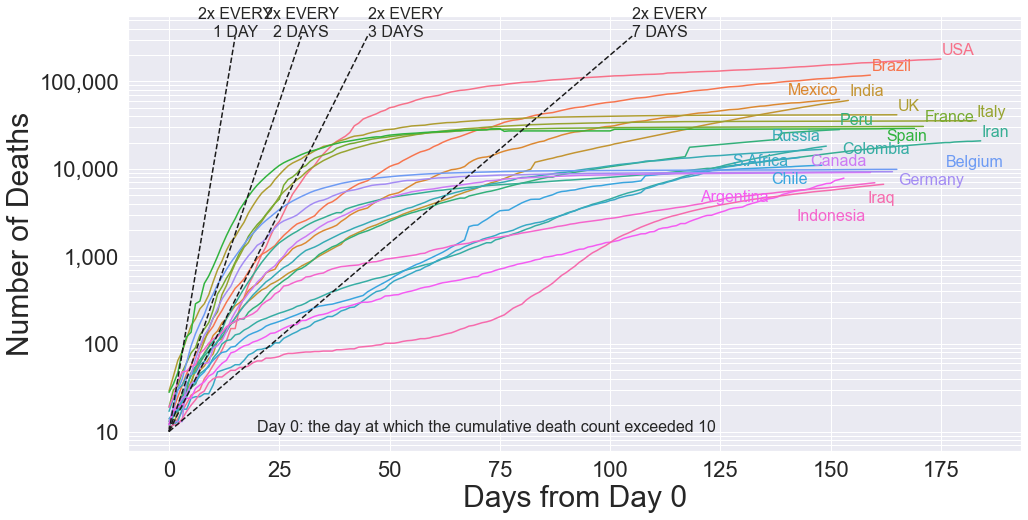

In [12]:
sns.set(rc={'figure.figsize':(16,8)}, font_scale = 2)
style = dict(size=10, color='gray')

ax = sns.lineplot(x="Days_from_0", y="Deaths", hue="Countries", data=covid_top_countries, markers=True, hue_order=top_countries, legend=False)
ax.set_yscale('log')
plt.grid(True, which='both')
ax.plot(x1, y_1, 'k--')
ax.plot(x2, y_2, 'k--')
ax.plot(x3, y_3, 'k--')
ax.plot(x7, y_7, 'k--')
ax.set_xlabel("Days from Day 0",fontsize=30)
ax.set_ylabel("Number of Deaths",fontsize=30)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.xlim([0, 150])
plt.text(20, 10, 'Day 0: the day at which the cumulative death count exceeded {:.0f}'.format(K), fontsize=16)
plt.text(x1.max(), y_1.max(), '2x EVERY\n1 DAY', ha = 'center', fontsize=16)
plt.text(x2.max(), y_2.max(), '2x EVERY\n2 DAYS', ha = 'center', fontsize=16)
plt.text(x3.max(), y_3.max(), '2x EVERY\n3 DAYS', ha = 'left', fontsize=16)
plt.text(x7.max(), y_7.max(), '2x EVERY\n7 DAYS', ha = 'left', fontsize=16)
texts = [plt.text(max_deaths.loc[str(country)]['Days_from_0'], max_deaths.loc[str(country)]['Deaths'], str(country), fontsize=16, color=ax.get_lines()[top_countries.index(country)].get_c(), ha = 'center', va = 'center') for country in top_countries]
adjust_text(texts)

plt.savefig('Fig_1_1_Machavolu_Manoj Chandra.png')

## CALCULATE THE RATE OF CHANGE

### Plot the daily deaths moving averages

In [13]:
# back_calc IS THE BACK WINDOW THAT IS USED TO CALCULATE THE SLOPE
back_calc = 7
slope_df = pd.DataFrame(columns=['Countries', 'Days_from_0', 'Slope', 'R2', 'P_value'])

for country in top_countries:
    one_country_data = covid_top_countries[covid_top_countries['Countries'] == str(country)].reset_index(drop=True)
#     one_country_data['log_cases'] = np.log10(one_country_data['Cases'])
    for i in np.arange(back_calc, len(one_country_data)+1):
        x = one_country_data.loc[i-back_calc: i, 'Days_from_0'] # That is the 'Days_from_0'
        y = one_country_data.loc[i-back_calc: i, 'Deaths'] # 
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        one_country_data.loc[i-1, 'Slope'] = slope
        one_country_data.loc[i-1, 'R2'] = r_value * r_value
        one_country_data.loc[i-1, 'P_value'] = p_value
        one_country = one_country_data[['Countries', 'Days_from_0', 'Slope', 'R2', 'P_value']]
    
    slope_df = slope_df.append(one_country, ignore_index=False)
    
slope_df.head(15)

,Countries,Days_from_0,Slope,R2,P_value
0,USA,0,NaN,NaN,NaN
1,USA,1,NaN,NaN,NaN
2,USA,2,NaN,NaN,NaN
3,USA,3,NaN,NaN,NaN
4,USA,4,NaN,NaN,NaN
5,USA,5,NaN,NaN,NaN
6,USA,6,3.011905,0.974751,0.000005
7,USA,7,3.738095,0.958956,0.000022
8,USA,8,4.464286,0.952415,0.000034
9,USA,9,5.404762,0.941221,0.000065


In [14]:
slope_df.set_index('Countries', drop=False, inplace=True)

In [15]:
slope_df.index.name = None
max_slope = slope_df.groupby(by=['Countries']).max()
max_slope = max_slope.sort_values('Slope', ascending=False)
max_slope['Countries'] = max_slope.index

data_1_5 = slope_df[slope_df.Countries.isin(max_slope[:5]['Countries'].tolist())]
countries_1_5 = max_slope[:5]['Countries'].tolist()
data_6_10 = slope_df[slope_df.Countries.isin(max_slope[5:10]['Countries'].tolist())]
countries_6_10 = max_slope[5:10]['Countries'].tolist()
data_11_15 = slope_df[slope_df.Countries.isin(max_slope[10:15]['Countries'].tolist())]
countries_11_15 = max_slope[10:15]['Countries'].tolist()
data_16_20 = slope_df[slope_df.Countries.isin(max_slope[15:20]['Countries'].tolist())]
countries_16_20 = max_slope[15:20]['Countries'].tolist()
max_slope

,Days_from_0,Slope,R2,P_value,Countries
Countries,,,,,
USA,175,2876.345238,0.998196,0.001091,USA
Brazil,159,1152.630952,0.997301,0.000060,Brazil
France,171,1010.666667,0.998144,0.019353,France
UK,165,977.142857,0.996646,0.000400,UK
India,154,971.190476,0.999857,0.000778,India
Peru,152,922.119048,0.999988,0.030433,Peru
Spain,169,872.214286,0.999424,1.000000,Spain
Italy,183,821.571429,0.999744,0.045427,Italy
Mexico,152,802.785714,0.996012,0.000237,Mexico


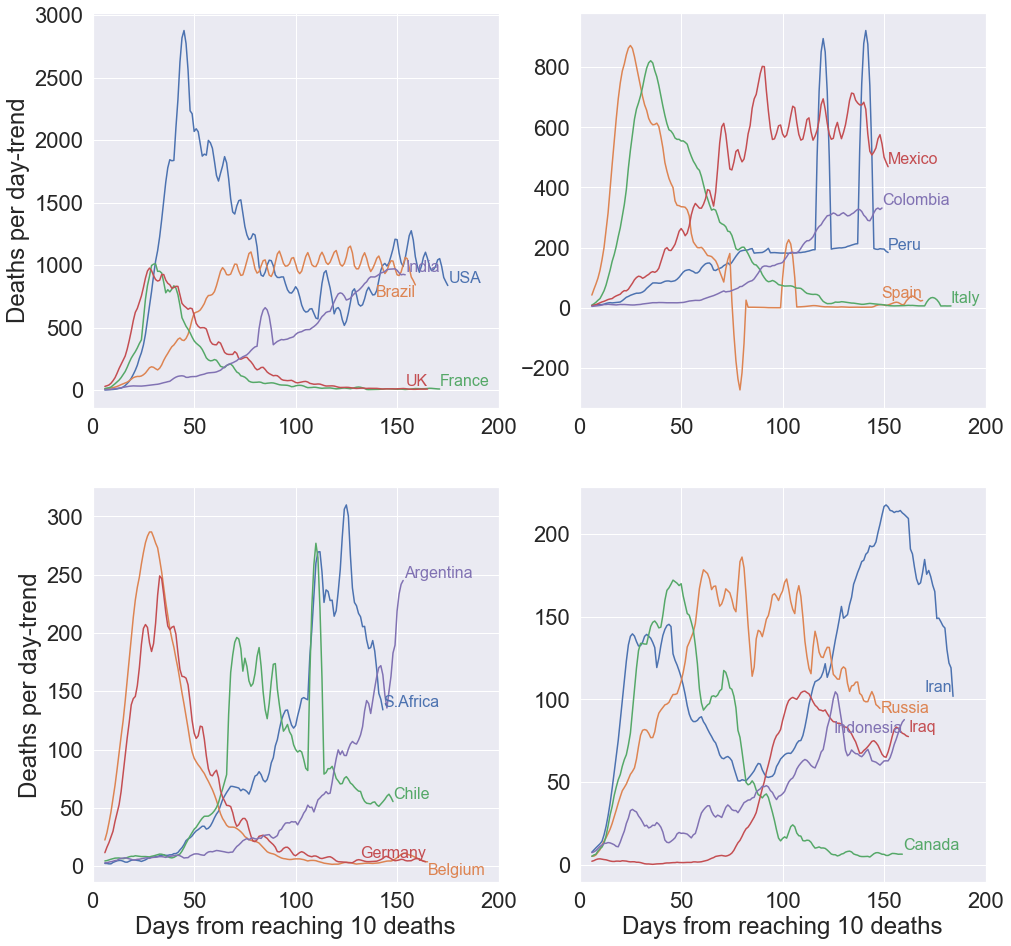

In [16]:
sns.set(rc={'figure.figsize':(16,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_1_5, markers=True, hue_order=countries_1_5, legend=False, ax=axes[0, 0])
texts = [axes[0, 0].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 0].get_lines()[countries_1_5.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_1_5]
adjust_text(texts)
axes[0, 0].set_ylabel("Deaths per day-trend",fontsize=24)

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_6_10, markers=True, hue_order=countries_6_10, legend=False, ax=axes[0, 1])
texts = [axes[0, 1].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 1].get_lines()[countries_6_10.index(country)].get_c(), ha = 'left', va = 'top') for country in countries_6_10]
adjust_text(texts)

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_11_15, markers=True, hue_order=countries_11_15, legend=False, ax=axes[1, 0])
texts = [axes[1, 0].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 0].get_lines()[countries_11_15.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_11_15]
adjust_text(texts)
axes[1, 0].set_ylabel("Deaths per day-trend",fontsize=24)
axes[1, 0].set_xlabel("Days from reaching 10 deaths",fontsize=24)

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_16_20, markers=True, hue_order=countries_16_20, legend=False, ax=axes[1, 1])
texts = [axes[1, 1].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 1].get_lines()[countries_16_20.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_16_20]
adjust_text(texts)
axes[1, 1].set_xlabel("Days from reaching 10 deaths",fontsize=24)

axes[0, 1].set_ylabel("",fontsize=24)
axes[1, 1].set_ylabel("",fontsize=24)
axes[0, 0].set_xlabel("",fontsize=24)
axes[0, 1].set_xlabel("",fontsize=24)
axes[0, 1].set_xlim([0, 200])
axes[1, 1].set_xlim([0, 200])
axes[0, 0].set_xlim([0, 200])
axes[1, 0].set_xlim([0, 200])
# axes[0, 0].set_yscale('log')
# axes[0, 1].set_yscale('log')
# axes[1, 0].set_yscale('log')
# axes[1, 1].set_yscale('log')

plt.savefig('Fig_1_2_Machavolu_Manoj Chandra.png')

# B

**A term that people started studying after the first few months of the pandemic is
that of excess deaths. Excess deaths are the additional deaths to the typical death
rate that are due to Covid-19. E.g. if the typical death rate for a country is 1000
deaths/day, and the Covid-19 deaths for a day is 500, then the excess death rate is
50%. You should see 1500 deaths/day in that country if the Covid-related deaths are
independent of the expected deaths (this is not the case).
To calculate the excess deaths, you need an estimate of the typical death rate per
country. Use the table 'Death rate crude per 1000 people.xls' with the code below to
import and make some changes in the dataframe**

In [17]:
death_rate = pd.read_excel("Death_rate_crude_per_1000_people.xls", sheet_name='Data', header=3, index_col=0).drop(columns=['Country Code','Indicator Name','Indicator Code'])
death_rate

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,6.388,6.241,6.118,6.012,5.920,5.839,5.770,5.716,5.682,5.666,...,7.918,8.061,8.205,8.347,8.488,8.627,8.765,8.907,NaN,NaN
Afghanistan,32.219,31.649,31.093,30.551,30.022,29.501,28.985,28.468,27.946,27.418,...,8.250,7.936,7.645,7.380,7.141,6.929,6.742,6.575,NaN,NaN
Angola,27.097,26.859,26.627,26.407,26.194,25.966,25.690,25.342,24.916,24.418,...,11.680,11.039,10.451,9.921,9.454,9.052,8.716,8.432,NaN,NaN
Albania,11.326,10.719,10.175,9.707,9.320,9.009,8.762,8.555,8.366,8.184,...,6.841,6.915,6.996,7.096,7.219,7.367,7.534,7.714,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.800,NaN,3.900,NaN,NaN,NaN,4.300,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.100,7.000,7.000,7.000,7.000,7.000,7.000,7.000,NaN,NaN
"Yemen, Rep.",36.234,36.031,35.732,35.321,34.790,34.136,33.365,32.500,31.563,30.572,...,6.189,6.094,6.030,5.992,5.974,5.969,5.972,5.978,NaN,NaN
South Africa,17.398,17.104,16.816,16.527,16.233,15.930,15.614,15.287,14.952,14.609,...,12.085,11.483,10.918,10.430,10.044,9.769,9.599,9.498,NaN,NaN


In [18]:
death_rate = death_rate.ffill(axis=1).iloc[:,-1]
death_rate = death_rate.to_frame(name="Death rate per 1000")
death_rate['Countries'] = death_rate.index
death_rate.replace('United States','USA',inplace=True)
death_rate.replace('United Kingdom','UK',inplace=True)
death_rate.replace('Korea, Rep.','S.Korea',inplace=True)
death_rate.replace('Iran, Islamic Rep.','Iran',inplace=True)
death_rate.replace('Saudi Arabia','S.Arabia',inplace=True)
death_rate.replace('South Africa','S.Africa',inplace=True)
death_rate

,Death rate per 1000,Countries
Country Name,,
Aruba,8.907,Aruba
Afghanistan,6.575,Afghanistan
Angola,8.432,Angola
Albania,7.714,Albania
Andorra,4.300,Andorra
...,...,...
Kosovo,7.000,Kosovo
"Yemen, Rep.",5.978,"Yemen, Rep."
South Africa,9.498,S.Africa


In [19]:
covid_top_countries_new = covid_top_countries.merge(death_rate, how='left', on='Countries')
covid_top_countries_new

,Unnamed: 0,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0,Death rate per 1000
0,3781,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0,4.835
1,3848,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1,4.835
2,3915,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2,4.835
3,3982,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3,4.835
4,4049,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4,4.835
...,...,...,...,...,...,...,...,...,...,...
3230,38027,607045,12987,2020-08-23,S.Africa,58558267.0,Africa,2020-04-06,139,9.498
3231,38236,609773,13059,2020-08-24,S.Africa,58558267.0,Africa,2020-04-06,140,9.498
3232,38445,611450,13159,2020-08-25,S.Africa,58558267.0,Africa,2020-04-06,141,9.498
3233,38654,613017,13308,2020-08-26,S.Africa,58558267.0,Africa,2020-04-06,142,9.498


In [20]:
covid_top_countries_new['Typical_deaths_per_day'] = covid_top_countries_new['Death rate per 1000']*covid_top_countries_new['Population']/ 1000 /365
covid_top_countries_new['Typical_cumulative_deaths'] = (covid_top_countries_new['Days_from_0'] + 1)*covid_top_countries_new['Typical_deaths_per_day']
covid_top_countries_new['Excess_death_rate'] = covid_top_countries_new['Deaths'] /covid_top_countries_new['Typical_cumulative_deaths']*100 
covid_top_countries_new

,Unnamed: 0,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0,Death rate per 1000,Typical_deaths_per_day,Typical_cumulative_deaths,Excess_death_rate
0,3781,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0,4.835,1098.325131,1098.325131,1.092573
1,3848,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1,4.835,1098.325131,2196.650261,0.682858
2,3915,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2,4.835,1098.325131,3294.975392,0.576636
3,3982,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3,4.835,1098.325131,4393.300522,0.591810
4,4049,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4,4.835,1098.325131,5491.625653,0.619125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,38027,607045,12987,2020-08-23,S.Africa,58558267.0,Africa,2020-04-06,139,9.498,1523.798411,213331.777521,6.087701
3231,38236,609773,13059,2020-08-24,S.Africa,58558267.0,Africa,2020-04-06,140,9.498,1523.798411,214855.575932,6.078036
3232,38445,611450,13159,2020-08-25,S.Africa,58558267.0,Africa,2020-04-06,141,9.498,1523.798411,216379.374343,6.081448
3233,38654,613017,13308,2020-08-26,S.Africa,58558267.0,Africa,2020-04-06,142,9.498,1523.798411,217903.172754,6.107300


In [21]:
covid_top_countries_new.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
covid_top_countries_new

,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0,Death rate per 1000,Typical_deaths_per_day,Typical_cumulative_deaths,Excess_death_rate
0,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0,4.835,1098.325131,1098.325131,1.092573
1,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1,4.835,1098.325131,2196.650261,0.682858
2,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2,4.835,1098.325131,3294.975392,0.576636
3,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3,4.835,1098.325131,4393.300522,0.591810
4,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4,4.835,1098.325131,5491.625653,0.619125
...,...,...,...,...,...,...,...,...,...,...,...,...
3230,607045,12987,2020-08-23,S.Africa,58558267.0,Africa,2020-04-06,139,9.498,1523.798411,213331.777521,6.087701
3231,609773,13059,2020-08-24,S.Africa,58558267.0,Africa,2020-04-06,140,9.498,1523.798411,214855.575932,6.078036
3232,611450,13159,2020-08-25,S.Africa,58558267.0,Africa,2020-04-06,141,9.498,1523.798411,216379.374343,6.081448
3233,613017,13308,2020-08-26,S.Africa,58558267.0,Africa,2020-04-06,142,9.498,1523.798411,217903.172754,6.107300


In [22]:
max_deaths = covid_top_countries_new.groupby(by=['Countries']).max()
max_deaths

,Cases,Deaths,Date_x,Population,Continent,Day_0,Days_from_0,Death rate per 1000,Typical_deaths_per_day,Typical_cumulative_deaths,Excess_death_rate
Countries,,,,,,,,,,,
Argentina,370175,7839,2020-08-27,4.478068e+07,America,2020-03-27,153,7.616,934.382523,1.438949e+05,5.447726
Belgium,82936,9879,2020-08-27,1.145552e+07,Europe,2020-03-15,165,9.600,301.295842,5.001511e+04,56.547412
Brazil,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-21,159,6.378,3687.873513,5.900598e+05,19.941200
Canada,126417,9094,2020-08-27,3.741104e+07,America,2020-03-21,159,7.500,768.719959,1.229952e+05,12.999728
Chile,402365,10990,2020-08-27,1.895204e+07,America,2020-04-01,148,6.076,315.486479,4.700749e+04,24.476592
Colombia,572270,18184,2020-08-27,5.033944e+07,America,2020-03-31,149,5.503,758.953301,1.138430e+05,15.972876
France,253587,30544,2020-08-27,6.701288e+07,Europe,2020-03-09,171,9.000,1652.372458,2.842081e+05,28.142643
Germany,237936,9285,2020-08-27,8.301921e+07,Europe,2020-03-16,164,11.300,2570.183855,4.240803e+05,5.365127
India,3310234,60472,2020-08-27,1.366418e+09,Asia,2020-03-26,154,7.210,26991.430194,4.183672e+06,1.445429


In [23]:
max_deaths['Typical_deaths_per_day'] = max_deaths['Death rate per 1000']*max_deaths['Population']/ 1000 /365
max_deaths['Typical_cumulative_deaths'] = (max_deaths['Days_from_0'] + 1)*max_deaths['Typical_deaths_per_day']
max_deaths['Excess_death_rate'] = max_deaths['Deaths'] /max_deaths['Typical_cumulative_deaths']*100 

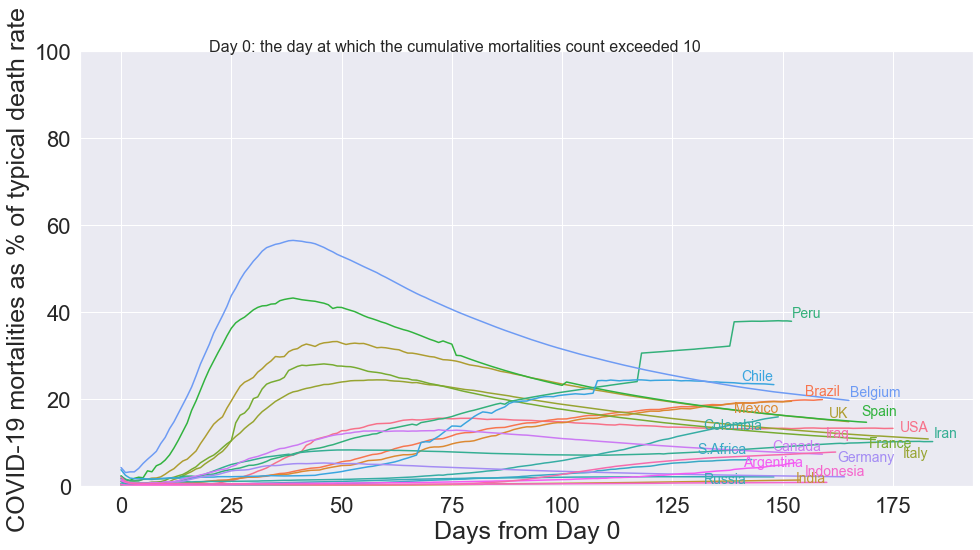

In [24]:
sns.set(rc={'figure.figsize':(16,8)}, font_scale = 2)
style = dict(size=10, color='gray')
ax = sns.lineplot(x="Days_from_0", y="Excess_death_rate", hue="Countries", data=covid_top_countries_new, markers=True, hue_order=top_countries, legend=False)
ax.set_yscale('linear')
plt.grid(True, which='both')
ax.set_xlabel("Days from Day 0",fontsize=25)
ax.set_ylabel("COVID-19 mortalities as % of typical death rate",fontsize=25)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.xlim([0, 150])
plt.ylim([0, 100])
plt.text(20, 100, 'Day 0: the day at which the cumulative mortalities count exceeded {:.0f}'.format(K), fontsize=16)
texts = [plt.text(max_deaths.loc[str(country)]['Days_from_0'],max_deaths.loc[str(country)]['Excess_death_rate'], str(country), fontsize=14, color=ax.get_lines()[top_countries.index(country)].get_c(), ha = 'center', va = 'center') for country in top_countries]
adjust_text(texts)

plt.savefig('Fig_1_3_Machavolu_Manoj Chandra.png')